<a href="https://colab.research.google.com/github/IA2021UR/trabajo-ia-en-la-comunidad-de-la-rioja-equipo-3/blob/main/Recorte_Abalos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt
import imutils
%matplotlib inline

In [1]:
!wget https://www.dropbox.com/s/mvhvpxm1n2k02rv/stitching.zip?dl=1 -O stitching.zip

--2021-05-11 15:31:39--  https://www.dropbox.com/s/mvhvpxm1n2k02rv/stitching.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/mvhvpxm1n2k02rv/stitching.zip [following]
--2021-05-11 15:31:39--  https://www.dropbox.com/s/dl/mvhvpxm1n2k02rv/stitching.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9cdbf620f86781e5dfe73b5129.dl.dropboxusercontent.com/cd/0/get/BOSzR7LPMoAZyH0G4KT_ZZlNJ7eRhO6DFAE2Oj1XBdDnElgJrD7SqIXlb9GY_ZDCQPVWNyU9trvPCJIDK3y-MNPAF4i0jbR-WBQq4xMNNttTm8QSTAZA7H1BAuLiQjyOJc_0RTxiaLEtBpsfjJzCVqYE/file?dl=1# [following]
--2021-05-11 15:31:40--  https://uc9cdbf620f86781e5dfe73b5129.dl.dropboxusercontent.com/cd/0/get/BOSzR7LPMoAZyH0G4KT_ZZlNJ7eRhO6DFAE2Oj1XBdDnElgJrD7SqIXlb9GY_ZDCQPVWNyU9trvPCJIDK3

In [2]:
!unzip stitching.zip

Archive:  stitching.zip
   creating: Abalos/
  inflating: Abalos/Abalos_04.jpg    
  inflating: Abalos/Abalos_05.jpg    
  inflating: Abalos/Abalos_06.jpg    
  inflating: Abalos/Abalos_07.jpg    
  inflating: Abalos/Abalos_01.jpg    
  inflating: Abalos/Abalos_02.jpg    
  inflating: Abalos/Abalos_03.jpg    
   creating: Brieva/
  inflating: Brieva/Brieva-13.jpg    
  inflating: Brieva/Brieva-14.jpg    
  inflating: Brieva/Brieva-16.jpg    
  inflating: Brieva/Brieva-23.jpg    
  inflating: Brieva/Brieva-25.jpg    
  inflating: Brieva/Brieva-27.jpg    
  inflating: Brieva/Brieva-28 A.jpg  
  inflating: Brieva/Brieva-28 B.jpg  
  inflating: Brieva/Brieva-28 C.jpg  
  inflating: Brieva/Brieva-29.jpg    
  inflating: Brieva/Brieva-30.jpg    
  inflating: Brieva/Brieva-32.jpg    
  inflating: Brieva/Brieva-34 bis.jpg  
  inflating: Brieva/Brieva-34.jpg    
  inflating: Brieva/Brieva-35 A.jpg  
  inflating: Brieva/Brieva-35 B.jpg  
  inflating: Brieva/Brieva-35 C.jpg  
  inflating: Brieva/

In [3]:
def mostrarImagen(image):
    if len(image.shape)==3:
        img2 = image[:,:,::-1]
        plt.imshow(img2)
        plt.show()
    else:
        img2 = image
        plt.imshow(img2,cmap='gray')
        plt.show()

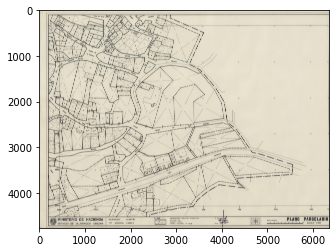

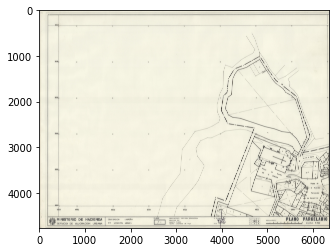

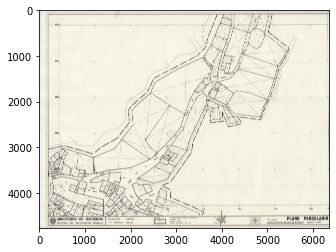

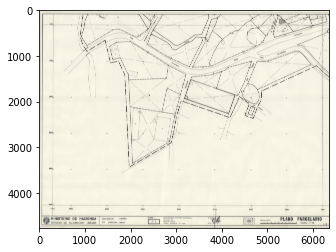

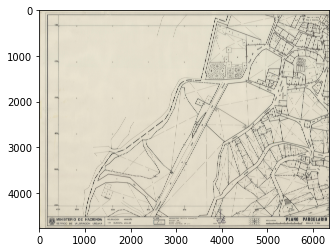

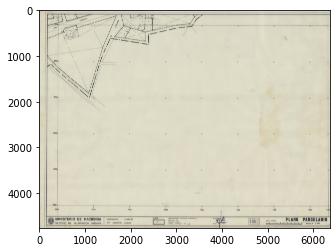

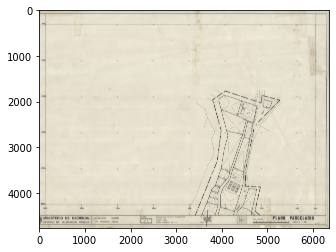

In [44]:
import os
# Cargando imágenes de Abalos
abalos = []
for image in os.listdir("Abalos"):
    i=cv2.imread("Abalos/" + image)
    
    imagenRecortada=i[0:4770,391:6752]
    mostrarImagen(imagenRecortada)

    abalos.append(i)

In [34]:
imagenRecortada=imagen[0:4770,391:6752]

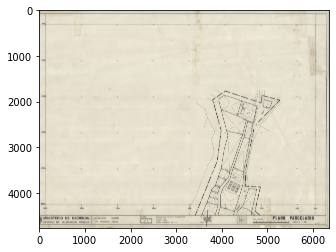

In [38]:
mostrarImagen(imagenRecortada)

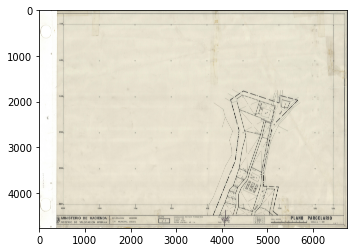

In [6]:
imagen = cv2.imread("Abalos/Abalos_01.jpg")
mostrarImagen(imagen)

In [41]:
gray = cv2.cvtColor(imagenRecortada, cv2.COLOR_BGR2GRAY)
cnts, _ = cv2.findContours(gray.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

Contorno #1 -- solidity=1.00


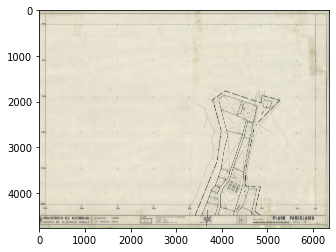

In [42]:
for (i, c) in enumerate(cnts):
    # Calculamos el área del contorno
    area = cv2.contourArea(c)
    # Calculamos el rectángulo contenedor
    (x, y, w, h) = cv2.boundingRect(c)
    # Calculamos el convex hull
    hull = cv2.convexHull(c)
    # Calculamos el área del convex hull
    hullArea = cv2.contourArea(hull)
    # Calculamos la solidity
    solidity = area / float(hullArea)
    print("Contorno #{} -- solidity={:.2f}".format(i + 1, solidity))
    clone = imagenRecortada.copy()
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 3)
    mostrarImagen(clone)